In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\mukes\\Downloads\\MLR\\MLR\\ToyotaCorolla - MLR.csv")
data


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
# Display the first few rows of the dataset
print(data.head())

# Get summary statistics
print(data.describe())

# Check data types and missing values
print(data.info())
print(data.isnull().sum())


   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.

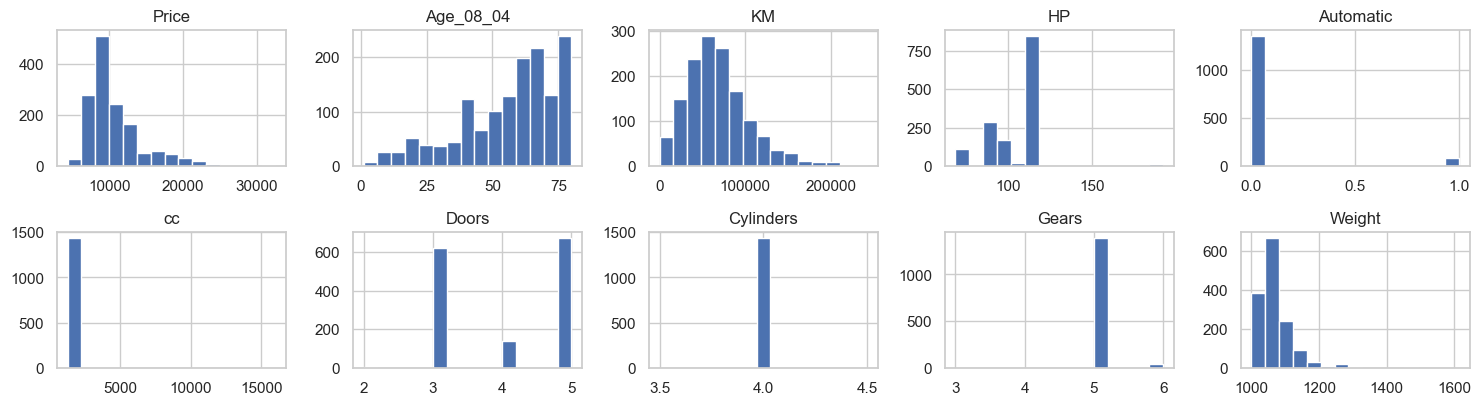

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Histogram for each numerical feature
data.hist(bins=15, figsize=(15, 10), layout=(5, 5))
plt.tight_layout()
plt.show()


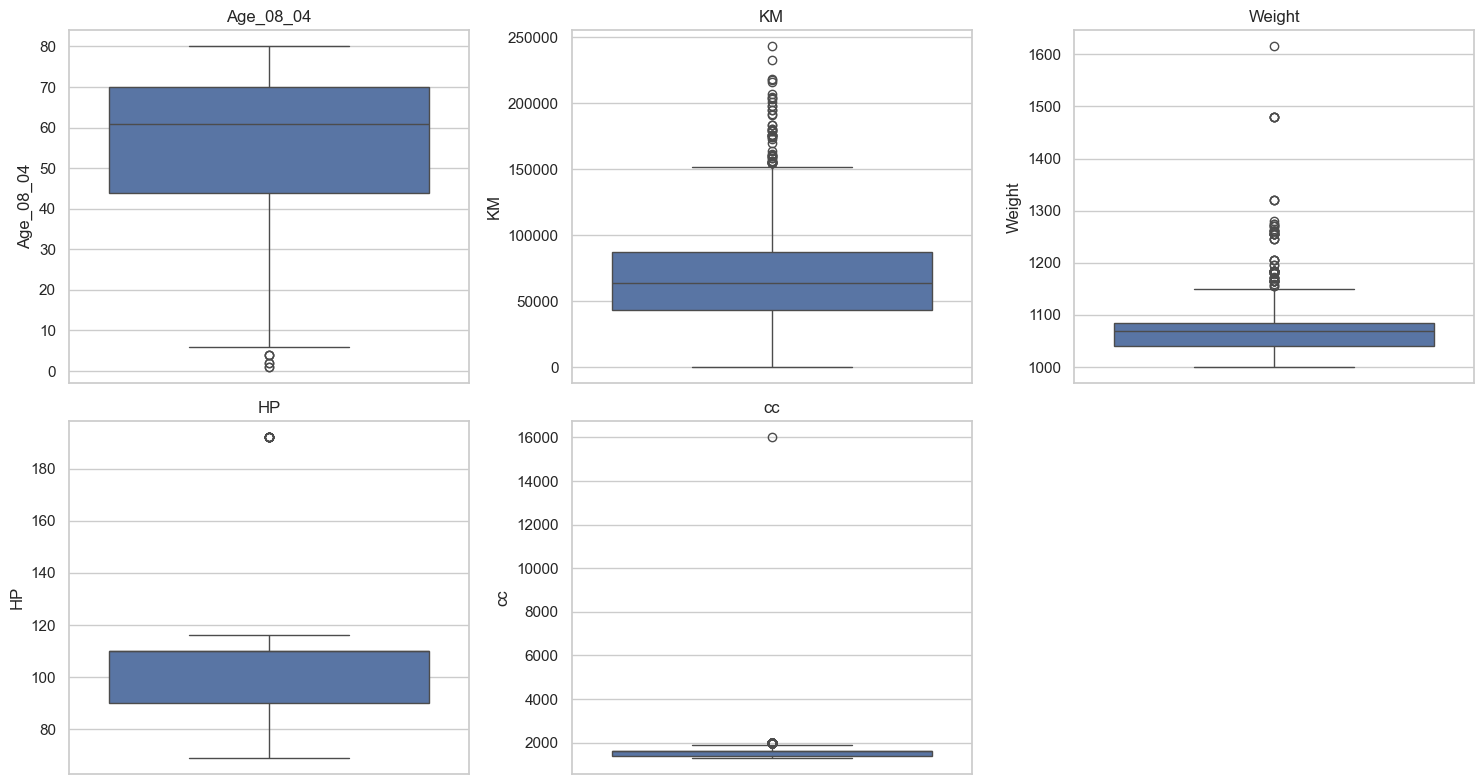

In [4]:
# Boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, column in enumerate(['Age_08_04', 'KM', 'Weight', 'HP', 'cc']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


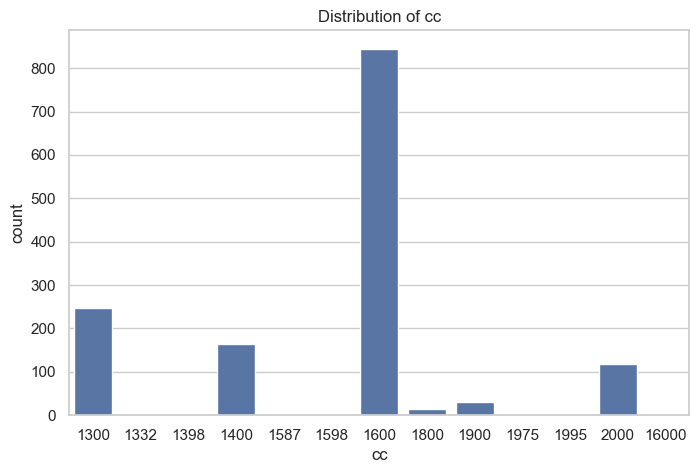

In [5]:
# Countplots for categorical variables
plt.figure(figsize=(8, 5))
sns.countplot(x='cc', data=data)
plt.title('Distribution of cc')
plt.show()


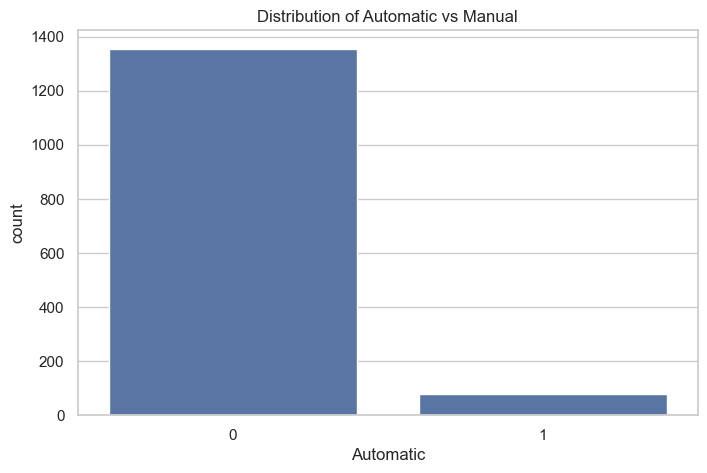

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Automatic', data=data)
plt.title('Distribution of Automatic vs Manual')
plt.show()

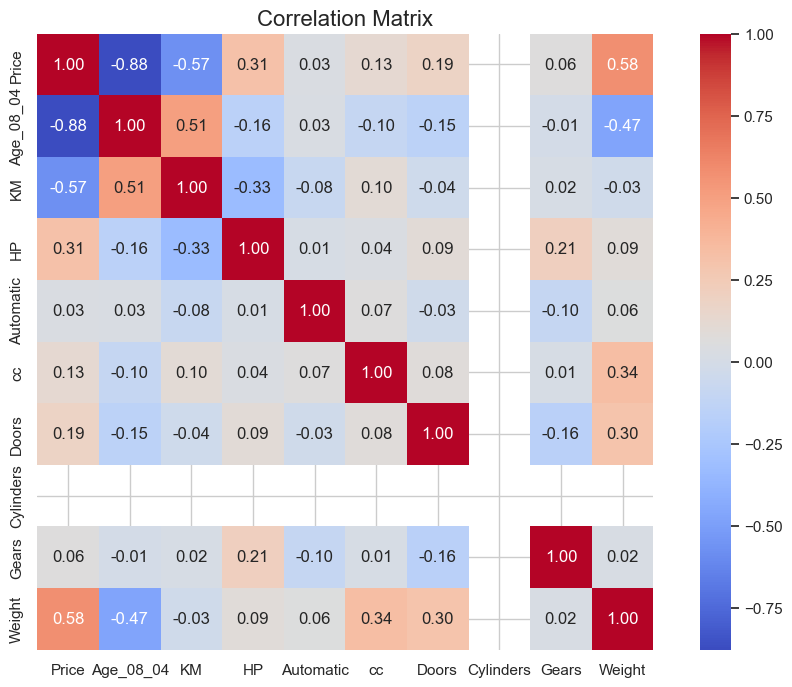

In [7]:
# Ensure that only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [8]:
# Dropping rows with missing values (if any)
data.dropna(inplace=True)
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [9]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'data'
# Define x and y
x = data.drop(columns=['cc'])  
y = data['cc']  

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x)

      Price  Age_08_04     KM   HP  Automatic  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0      3          4      5   
1     13750         23  72937   90          0      3          4      5   
2     13950         24  41711   90          0      3          4      5   
3     14950         26  48000   90          0      3          4      5   
4     13750         30  38500   90          0      3          4      5   
...     ...        ...    ...  ...        ...    ...        ...    ...   
1431   7500         69  20544   86          0      3          4      5   
1432  10845         72  19000   86          0      3          4      5   
1433   8500         71  17016   86          0      3          4      5   
1434   7250         70  16916   86          0      3          4      5   
1435   6950         76      1  110          0      5          4      5   

      Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0       1165              True             False  
1       1

In [11]:
print(y)

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
1431    1300
1432    1300
1433    1300
1434    1300
1435    1600
Name: cc, Length: 1436, dtype: int64


In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example dataset (replace this with your actual data)
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 3, 4, 5, 6],
    'Age_08_04': [1, 2, 3, 4, 5]  # Target variable
})

# Define features and target variable
X = data[['feature1', 'feature2']]  # Features
y = data['Age_08_04']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model1 = LinearRegression()

# Fit the model
model1.fit(X_train, y_train)

# Get coefficients
coefficients1 = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])

# Print the coefficients DataFrame
print(coefficients1)


          Coefficient
feature1          0.5
feature2          0.5


In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example dataset (replace this with your actual data)
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 3, 4, 5, 6],
    'Age_08_04': [1, 2, 3, 4, 5]  # Target variable
})

# Define features and target variable
X = data[['feature1', 'feature2']]  # Features
y = data['Age_08_04']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model2 = LinearRegression()

# Fit the model
model2.fit(X_train, y_train)

# Get coefficients
coefficients2 = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])

# Print the coefficients DataFrame
print(coefficients2)


          Coefficient
feature1          0.5
feature2          0.5


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example dataset (replace this with your actual data)
data = pd.DataFrame({
    'Age_08_04': [1, 2, 3, 4, 5] * 230,  # Example data, adjust as needed
    'KM': [100, 200, 300, 400, 500] * 230,
    'Target': [1, 2, 3, 4, 5] * 230  # Replace with your actual target variable
})

# Define features and target variable
X = data[['Age_08_04', 'KM']]
y = data['Target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding interaction terms
x_train_Age_KM = x_train.copy()
x_train_Age_KM['Age_KM'] = x_train['Age_08_04'] * x_train['KM']  # Create a new column for the interaction term

x_test_Age_KM = x_test.copy()
x_test_Age_KM['Age_KM'] = x_test['Age_08_04'] * x_test['KM']  # Create a new column for the interaction term

# Check sizes to ensure they match
print(f"x_train_Age_KM shape: {x_train_Age_KM.shape}")
print(f"y_train shape: {y_train.shape}")

# Build the model
model3 = LinearRegression()

# Fit the model (ensure sizes match)
model3.fit(x_train_Age_KM, y_train)

# Get coefficients
coefficients3 = pd.DataFrame(model3.coef_, x_train_Age_KM.columns, columns=['coefficient'])  # Get coefficients
print(coefficients3)  # Print the coefficients DataFrame


x_train_Age_KM shape: (920, 3)
y_train shape: (920,)
            coefficient
Age_08_04  9.999000e-05
KM         9.999000e-03
Age_KM     3.313873e-19


In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  # Example model
from sklearn.model_selection import train_test_split
import numpy as np

# Example data
X = np.random.rand(100, 5)  # Features
y = np.random.rand(100)      # Target

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining models
model1 = LinearRegression()
model2 = LinearRegression()  # Replace with your actual model
model3 = LinearRegression()  # Replace with your actual model

# Fitting the models
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

# Evaluation function
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluate all models
mse1, r2_1 = evaluate_model(model1, x_test, y_test)
mse2, r2_2 = evaluate_model(model2, x_test, y_test)  # Adjust for your actual data
mse3, r2_3 = evaluate_model(model3, x_test, y_test)  # Adjust for your actual data

print(f'Model 1 - MSE: {mse1}, R²: {r2_1}')
print(f'Model 2 - MSE: {mse2}, R²: {r2_2}')
print(f'Model 3 - MSE: {mse3}, R²: {r2_3}')


Model 1 - MSE: 0.07543397528581076, R²: -0.12773586358755162
Model 2 - MSE: 0.07543397528581076, R²: -0.12773586358755162
Model 3 - MSE: 0.07543397528581076, R²: -0.12773586358755162


In [13]:
from sklearn.linear_model import Lasso

# Fit Lasso model
lasso = Lasso(alpha=0.1) # you can tune the alpha parameter
lasso.fit(x_train,y_train)

# Evaluate Lasso model
mse_lasso, r2_lasso = evaluate_model(lasso,x_test,y_test)
print(f'Lasso Regression - MSE: {mse_lasso},R² : {r2_lasso}')

Lasso Regression - MSE: 0.06688980157383391,R² : -7.007088860255806e-07


In [19]:
from sklearn.linear_model import Ridge

# Fit Ridge model
ridge = Ridge(alpha=0.1) # you can tune the alpha parameter
ridge.fit(x_train,y_train)

# Evaluate Ridge model
mse_ridge, r2_ridge = evaluate_model(ridge,x_test,y_test)
print(f'Ridge Regression - MSE: {mse_ridge},R² : {r2_ridge}')

Ridge Regression - MSE: 0.07526880598356685,R² : -0.12526658704474114


In [1]:
INTERVIEW QUESTIONS

1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are two techniques used in data preprocessing, especially in the context of machine learning and statistical analysis.

Normalization
    
Normalization typically refers to the process of scaling individual samples to have a unit norm. 
    
This is often done to ensure that the features contribute equally to the distance calculations in algorithms that rely on distance metrics, such as k-nearest neighbors (KNN)
​
Benefits:

1.Ensures that all features contribute equally to the analysis.
    
2.Useful when features have different units or scales.
    
3.Enhances convergence speed in algorithms like gradient descent.

Standardization
    
Standardization (or Z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1.
    
This is particularly useful when the data follows a Gaussian distribution.

Benefits:

1.Centers the data around zero, which can improve performance for many algorithms.
                                                             
2.Useful for algorithms that assume data is normally distributed, like linear regression and logistic regression.
    
3.Helps in detecting outliers by giving them higher Z-scores.



2.What techniques can be used to address multicollinearity in multiple linear regression?


Remove Highly Correlated Predictors:

Analyze the correlation matrix and remove one of the predictors from pairs that exhibit high correlation (e.g., correlation coefficient > 0.8 or < -0.8).

    
Principal Component Analysis (PCA):

Use PCA to transform correlated predictors into a set of uncorrelated components. 
This can help reduce dimensionality and multicollinearity.
    

Regularization Techniques:

Ridge Regression: Adds a penalty equal to the square of the magnitude of coefficients (L2 regularization). This can reduce the impact of multicollinearity.
Lasso Regression: Adds a penalty equal to the absolute value of the coefficients (L1 regularization), which can shrink some coefficients to zero, effectively selecting a simpler model.

Variance Inflation Factor (VIF):
    
Calculate the VIF for each predictor. A VIF value greater than 5 or 10 indicates high multicollinearity. Consider removing predictors with high VIF values.


Combine Predictors:

Create composite variables by averaging or summing correlated predictors, thus reducing the number of features while retaining relevant information.

    
Feature Engineering:

Generate new features that capture the relationships among existing predictors in a way that reduces multicollinearity.

    
Increase Sample Size:

If possible, increasing the sample size can sometimes help mitigate the effects of multicollinearity.

    
Domain Knowledge:

Use subject matter expertise to prioritize predictors based on their importance to the outcome, potentially allowing for the removal of less critical predictors.



 
​


SyntaxError: invalid non-printable character U+200B (3218870789.py, line 12)